In [2]:
import numpy, seaborn, pandas
import scipy.stats as stats
import matplotlib, matplotlib.pyplot as plt
import warnings

C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [4]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

In [5]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Download

In [6]:
#data Proteomics
df = pandas.read_csv(file_directory+'1) input/proteomics/Pilot_ProteomicsData.csv', 
                     sep = ',', index_col = 'Gene')
df = df.iloc[:,4:-3]

df.columns = df.columns.str.split('_').str[0]
df_with_tripl = df.copy()
df = df.groupby(axis=1, level=0).median()
df = df[['Ctrl', '3h', '6h', '9h', '12h', '16h']]

print(df.shape, '\n')
df.head(3)

(2405, 6) 



,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,92.9,96.6,91.6,105.8,103.0,115.5
LARP1,103.3,106.6,103.5,99.1,95.3,93.2
ACTB,100.9,107.1,102.3,94.4,93.9,100.4


# Data transformation

## To Zscore 

In [7]:
# Convert to Z_score
df_zscore = stats.zscore(df, axis = 0)
df_zscore.head(2)

,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,-1.092419,-0.367305,-1.569021,0.917407,0.601398,2.127101
LARP1,0.748607,1.131631,0.843713,-0.246745,-0.859439,-1.056857


# Methods

# To visualize all our potential targets

    Gene conditions  value
0  RING1       Ctrl   93.5
1  SMYD5       Ctrl  101.6
2   RPL6       Ctrl   98.3
3  SUMO1       Ctrl  102.8
4  SUMO2       Ctrl   88.2 



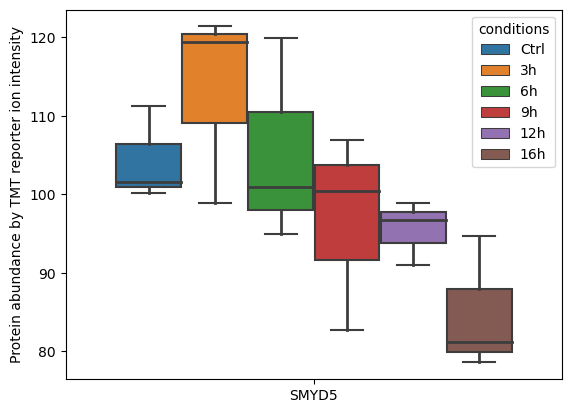

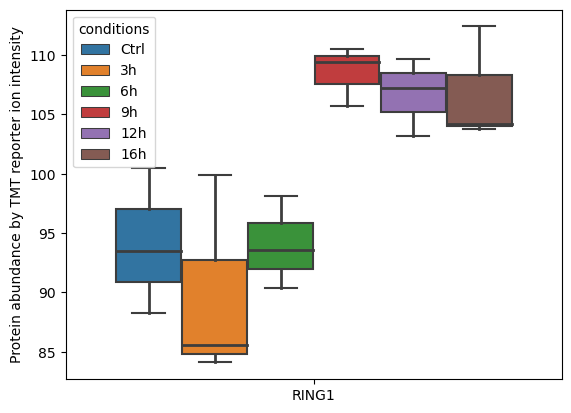

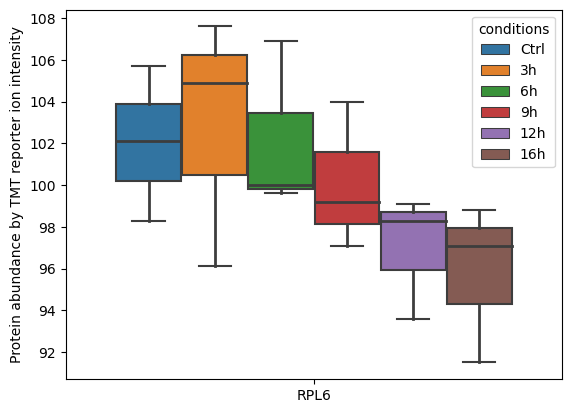

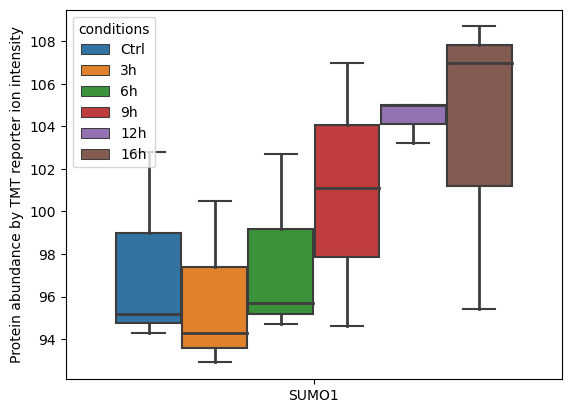

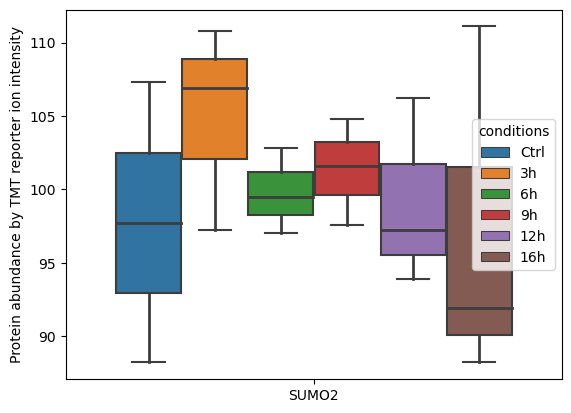

In [8]:
# Select the targets
target_genes = ['SMYD5', 'RING1', 'RPL6', 'SUMO1', 'SUMO2']
df_targets = df_with_tripl[df_with_tripl.index.isin(target_genes)]

# From Wide to Long table
df_targets = df_targets.reset_index()
df_targets = df_targets.melt(id_vars=["Gene"], var_name="conditions")

## pull the technical triplicate
df_targets['conditions'] = df_targets['conditions'].str.split('_').str[0]
print(f'{df_targets.head()} \n')

# Expression of the target proteins over time
for target in target_genes:
    df_plt = df_targets[df_targets['Gene'] == target]
    seaborn.boxplot(df_plt, y = 'value', x = 'Gene', hue = 'conditions', 
                medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    
    plt.ylabel("Protein abundance by TMT reporter ion intensity")
    plt.xlabel("")
    plt.show()
    plt.close()

    Gene conditions  value
0  RING1       Ctrl   93.5
1  SMYD5       Ctrl  101.6
2   RPL6       Ctrl   98.3
3  SUMO1       Ctrl  102.8
4  SUMO2       Ctrl   88.2 



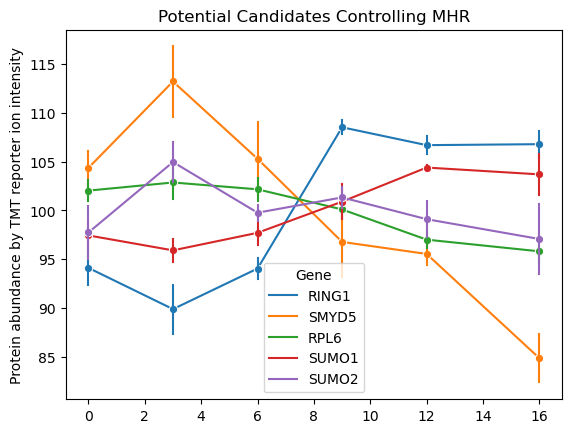

In [9]:
# Select the targets
target_genes = ['SMYD5', 'RING1', 'RPL6', 'SUMO1', 'SUMO2']
df_targets= df_with_tripl[df_with_tripl.index.str.contains('|'.join(target_genes))]



# From Wide to Long table
df_targets = df_targets.reset_index()
df_targets = df_targets.melt(id_vars=["Gene"], var_name="conditions")

## pull the technical triplicate
df_targets['conditions'] = df_targets['conditions'].str.split('_').str[0]
print(f'{df_targets.head()} \n')

# Print linregess results for the targets
df_targets2 = df_targets.copy()
df_targets2['conditions'].replace({'Ctrl': 0, '3h': 3, '6h': 6, 
                                  '9h': 9, '12h': 12, '16h': 16, }, inplace=True)

seaborn.lineplot(data = df_targets2, x='conditions' , y='value', hue= "Gene",
                marker='o',err_style="bars", errorbar=('se', 0.5))


plt.title("Potential Candidates Controlling MHR")
plt.ylabel("Protein abundance by TMT reporter ion intensity")
plt.xlabel("")
plt.show()
plt.close()